In [1]:
# version sencilla rnn
import os
import math
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import preprocessing as skpp
from sklearn.model_selection import train_test_split 
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

c:\users\ledra\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
filepath=os.path.join('international-airline-passengers.csv')
dataframe=pd.read_csv(filepath,usecols=[1],header=0)

In [3]:
dataframe.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [4]:
dataset=dataframe.values
dataset=dataframe.astype(np.float32)

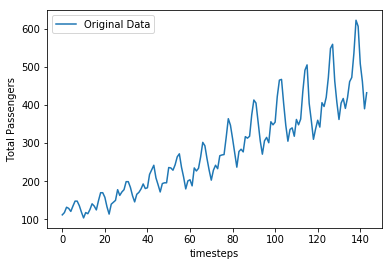

In [5]:
plt.plot(dataset,label='Original Data')
plt.legend()
plt.xlabel('timesteps')
plt.ylabel('Total Passengers')
plt.show()

In [6]:
# normalize the dataset
scaler = skpp.MinMaxScaler(feature_range=(0, 1))
impute=skpp.Imputer()
imput_dataset = impute.fit_transform(dataset)
normalized_dataset=scaler.fit_transform(imput_dataset)

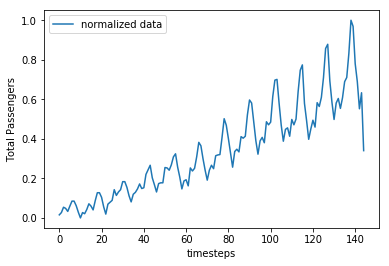

In [7]:
plt.plot(normalized_dataset,label='normalized data')
plt.legend()
plt.xlabel('timesteps')
plt.ylabel('Total Passengers')
plt.show()

In [8]:
x=np.asarray(normalized_dataset[0:-1])
y=np.asarray(normalized_dataset[1:])


In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,shuffle=False)


# Tensorflow

In [10]:
state_size=4
n_epochs=100
n_timesteps=1
learning_rate=0.1

In [11]:
X_p=tf.placeholder(tf.float32,[1],name='X_p' )
Y_p=tf.placeholder(tf.float32,[1],name='Y_p' )

In [12]:
cell=tf.nn.rnn_cell.BasicRNNCell(state_size)

In [13]:
W=tf.get_variable('W',[state_size,1])
b=tf.get_variable('b',[1],initializer=tf.constant_initializer(0.0))


In [ ]:
mse=tf.losses.mean_squared_error